In [7]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline 

Seaborn 的绘图方法大致分类 6 类: 

- 关联图
- 类别图
- 分布图
- 回归图
- 矩阵图
- 组合图

## （1） 风格设置 
- seaborn的风格设置主要分为两类：风格（style）设置和环境（context）设置

- seaborn设置风格的方法主要有三种：
    - set，通用设置接口
    - set_style，风格专用设置接口，设置后全局风格随之改变
    - axes_style，设置当前图（axes级）的风格，同时返回设置后的风格系列参数
    
    
- 当前支持的风格主要有5种：
    - darkgrid（默认风格）
    - whitegrid
    - dark
    - white
    - ticks

In [8]:
# 数据准备
def sinplot(flip=1):
    x = np.linspace(0,14,100)
    for i in range(1,7):
        plt.plot(x, np.sin(x+i*0.5)*(7-i)*flip)

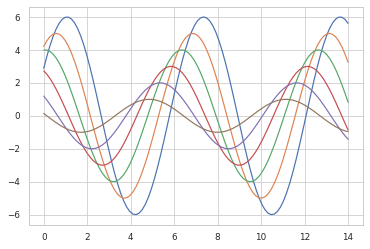

In [9]:
sinplot()

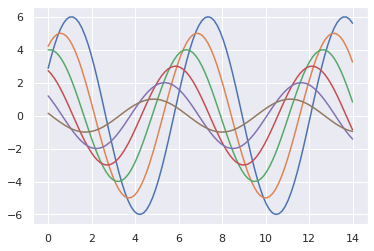

In [10]:
sns.set() #默认风格
sinplot()

NameError: name 's' is not defined

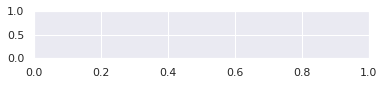

In [11]:
# darkgrid（默认风格）
# whitegrid
# dark
# white
# ticks

styles = ['darkgrid', 'whitegrid', 'dark', 'ticks']
for i,styles in zip([411, 412, 413, 414], styles):
    with sns.axes_style(styles):
        plt.subplot(i)
        plt.title(s)
        sinplot()

In [ ]:
#darkgrid（默认风格）, whitegrid, dark, white,ticks
sns.set_style('ticks') 
plt.title('ticks')
sinplot()
sns.despine()

## （2） 颜色/调色板
* color_palette() 能传入任何 matplotlib 里面的颜色  
* color_palette() 不屑参数则默认颜色  
* set_palette() 设置所有图的颜色

In [ ]:
# 分类色板默认颜色（深色）
current_palette = sns.color_palette()
print(current_palette)
sns.palplot(current_palette[0])
sns.palplot(current_palette)

### 圆形画板  
* 当有多个分类需要分区时，最简单的方法就是在一个圆形空间上均匀的分割颜色
* 最常用的方法就是 hls 的颜色空间

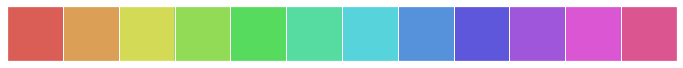

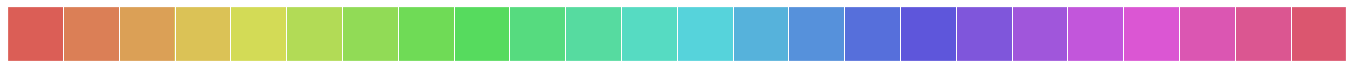

In [12]:
sns.palplot(sns.color_palette('hls', 12))
sns.palplot(sns.color_palette('hls', 24))

颜色示例

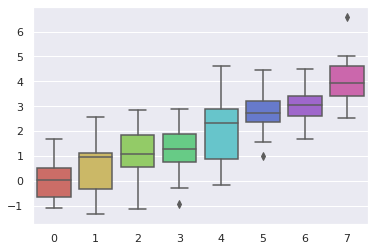

In [13]:
data=np.random.normal(size=(20,8)) + np.arange(8)/2
sns.boxplot(data=data, 
            palette=sns.color_palette('hls',8))

### hls_palette() 函数控制颜色亮度和饱和度  
* l: 亮度，lightness  
* s: 饱和度，saturation

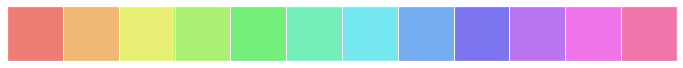

In [14]:
sns.palplot(sns.hls_palette(12, l=0.7, s=0.8))

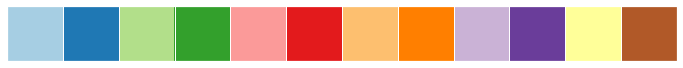

In [15]:
# 成对存在的调色板（方便对比）
sns.palplot(sns.color_palette('Paired',12))

使用xkcd颜色来命名颜色(需要了解命名方式)

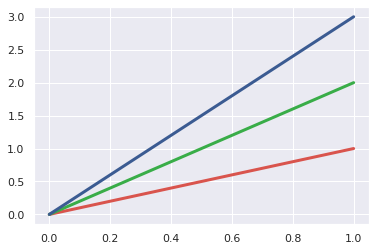

In [16]:
plt.plot([0,1],[0,1],sns.xkcd_rgb['pale red'],lw=3)
plt.plot([0,1],[0,2],sns.xkcd_rgb['medium green'],lw=3)
plt.plot([0,1],[0,3],sns.xkcd_rgb['denim blue'],lw=3)

连续色板，色彩随数据变换（比如数据越重要颜色越深）

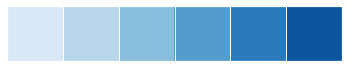

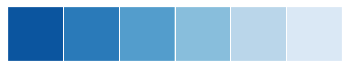

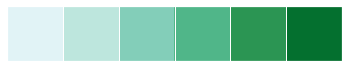

In [17]:
sns.palplot(sns.color_palette('Blues'))

sns.palplot(sns.color_palette('Blues_r'))

sns.palplot(sns.color_palette('BuGn'))

## （3）单变量单特征分析 （直方图）

In [18]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord,'distributions')))

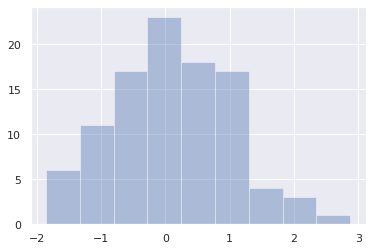

In [19]:
x = np.random.normal(size=100)
sns.distplot(x, kde=False)

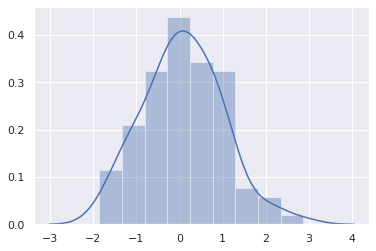

In [20]:
sns.distplot(x, kde=True)

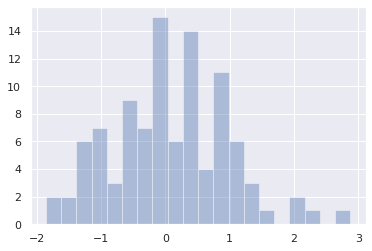

In [21]:
# 数据切分为 bins
sns.distplot(x, bins=20, kde=False)

## （4）多变量特征分布（散点图）

In [22]:
mean,cov = [0,1],[(1,0.5),(0.5,1)]
data = np.random.multivariate_normal(mean,cov,200)
df = pd.DataFrame(data,columns=['x','y'])
df.head()

,x,y
0,-0.995328,0.721782
1,-0.944528,0.276843
2,-1.109385,2.246853
3,0.682844,0.023013
4,-0.417883,-0.987145


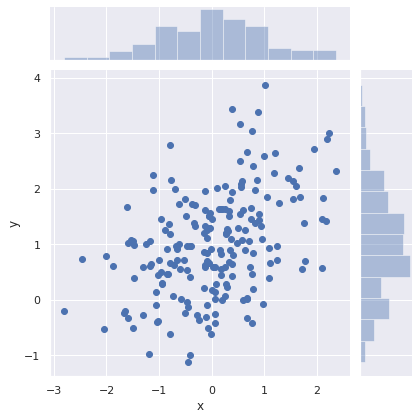

In [23]:
# 观测两个变量之间关系-方式1
sns.jointplot(x='x',y='y',data=df)

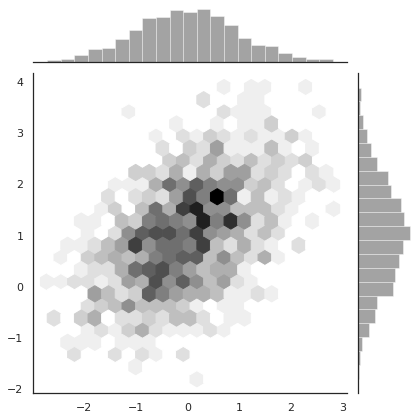

In [24]:
# 观测两个变量之间关系-方式2
# 大规模数据下根据颜色深浅分析数据数量
x,y = np.random.multivariate_normal(mean,cov,1000).T
with sns.axes_style('white'):
    sns.jointplot(x=x, 
                  y=y,
                  kind='hex', #
                  color='k')

## （5）变量特征成对分析

In [25]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


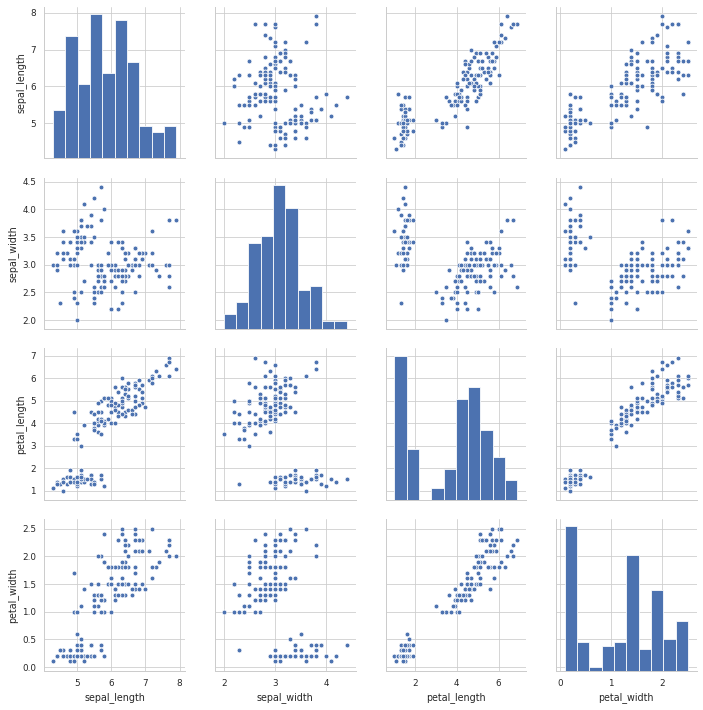

In [26]:
sns.set_style('whitegrid')
sns.set_context('paper')
sns.pairplot(iris) #成对特征分布分析(对角线为单特征分布，非对角线是特征对关系)

## （6）回归分析图

In [27]:
#消费金额|消费|性别|抽烟与否|日期|时间|人数
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


regplot() 和 implot() 都支持画回归关系图

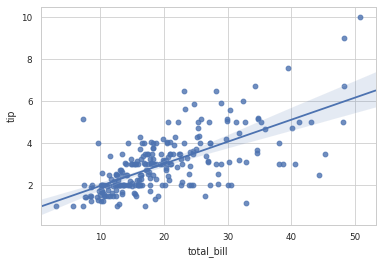

In [28]:
# 花费总结&小费的关联关系
sns.regplot(x='total_bill', 
            y='tip',
            data=tips)

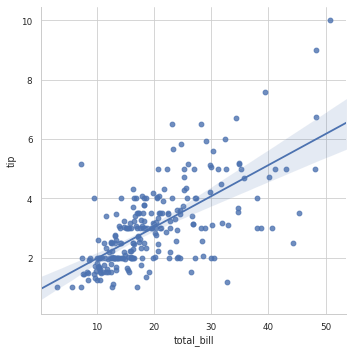

In [29]:
#sns.lmplot 功能更强大，但 sns.regplot 已足够使用
sns.lmplot(x='total_bill',
           y='tip',
           data=tips)

## （7）盒图 

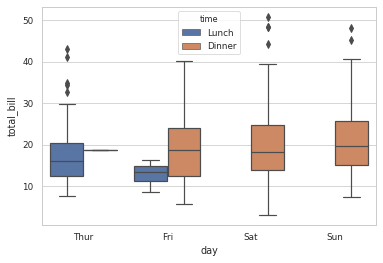

In [117]:
#消费金额|消费|性别|抽烟与否|日期|时间|人数
tips = sns.load_dataset('tips')
tips.head()

# 菱形代表离群点
sns.boxplot(x='day',
            y='total_bill',
            hue='time',
            data=tips)

## （8）热力图

[[ 2.98251195  1.1169844  -1.79085588]
 [-0.93143122  0.82138824  1.04250678]
 [ 1.16090399  0.40064247  1.09134246]]


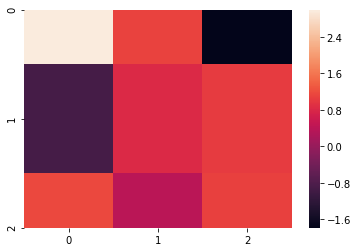

In [11]:
uniform_data = np.random.randn(3, 3)
print(uniform_data)
heatmap = sns.heatmap(uniform_data)

In [31]:
# 航班数据：年|月|乘客人数
flights_df = sns.load_dataset('flights')
flights_df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [32]:
flights = flights_df.pivot('month','year','passengers') # 列索引，行索引 值
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


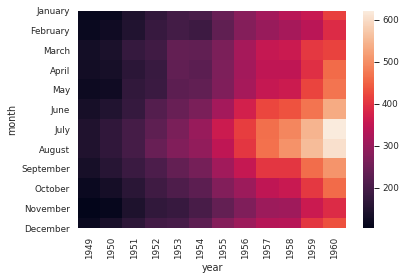

In [33]:
ax=sns.heatmap(flights) #自动划分合适的区间

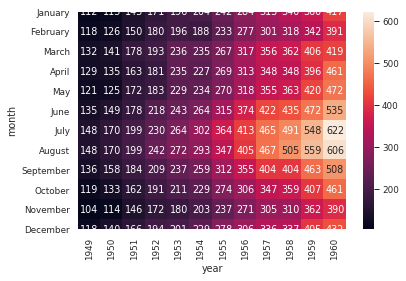

In [34]:
# 添加注释
ax=sns.heatmap(flights,
               annot=True, #是否添加注释
               fmt='d') #字体格式，默认格式乱码

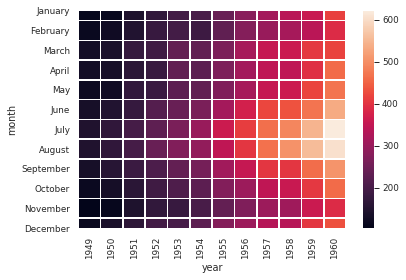

In [35]:
# 增加间距
x = sns.heatmap(flights,
              linewidths=0.5)

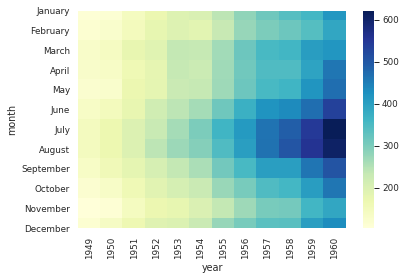

In [36]:
# 改变颜色
ax = sns.heatmap(flights, 
                 # cbar=False,   # 隐藏调色板
                 cmap='YlGnBu',) # Yl 黄 ，Gn 绿，Bu 蓝（常见的设置）